## Load libraries and Data

In [1]:
import numpy as np
import librosa
import sys
sys.path.append("../src")
from extract_features import *
from visualize_audio import *
from prepare_data import *

sr = 22050

## Preprocessing

In [2]:
audio1, sr = librosa.load("../data/raw/hindi1.mp3", sr=sr)
audio2, sr = librosa.load("../data/raw/hindi2.mp3", sr=sr)
audio3, sr = librosa.load("../data/raw/hindi3.mp3", sr=sr)


spectrogram1 = compute_spectrogram(audio1)
mel_spectrogram1 = compute_mel_spectrogram(audio1, sr)
mfcc1 = compute_mfcc(audio1, sr)

spectrogram2 = compute_spectrogram(audio2)
mel_spectrogram2 = compute_mel_spectrogram(audio2, sr)
mfcc2 = compute_mfcc(audio2, sr)

spectrogram3 = compute_spectrogram(audio3)
mel_spectrogram3 = compute_mel_spectrogram(audio3, sr)
mfcc2 = compute_mfcc(audio3, sr)

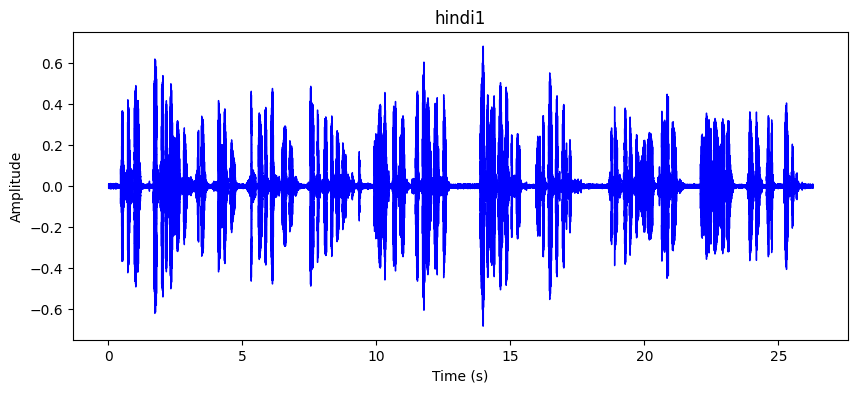

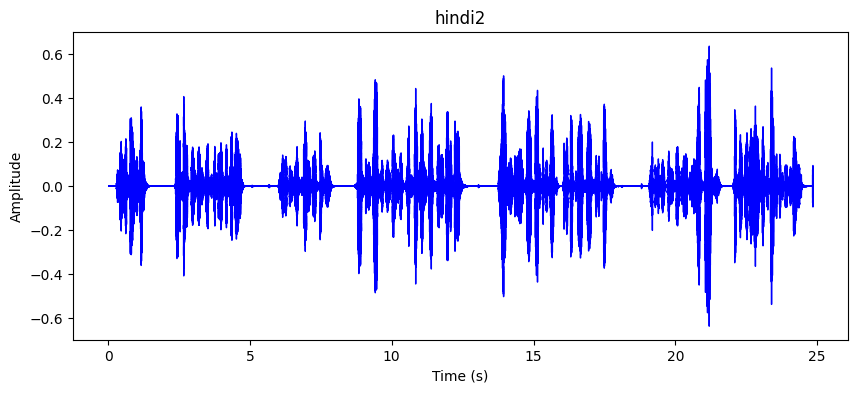

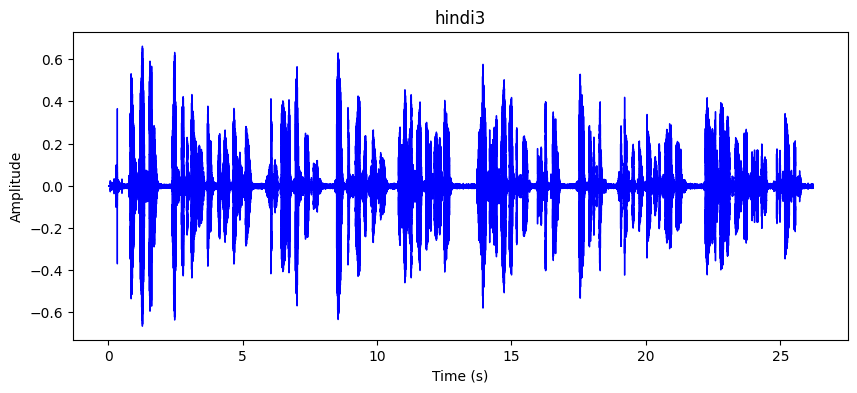

In [3]:
plot_audio(audio1, sr, title="hindi1")
plot_audio(audio2, sr, title="hindi2")
plot_audio(audio3, sr, title="hindi3")

In [4]:
energy = librosa.feature.rms(y=audio1)[0]
max_energy = max(energy)
threshold_energy = 0.01 * max_energy
silent_segments = energy < threshold_energy
ratio = sum(silent_segments) / len(energy)
print("ratio of silent segments for hindi 1:", round(100 * ratio, 2), "%")

energy = librosa.feature.rms(y=audio2)[0]
max_energy = max(energy)
threshold_energy = 0.01 * max_energy
silent_segments = energy < threshold_energy
ratio = sum(silent_segments) / len(energy)
print("ratio of silent segments for hindi 2:", round(100 * ratio, 2), "%")

energy = librosa.feature.rms(y=audio3)[0]
max_energy = max(energy)
threshold_energy = 0.01 * max_energy
silent_segments = energy < threshold_energy
ratio = sum(silent_segments) / len(energy)
print("ratio of silent segments for hindi 3:", round(100 * ratio, 2), "%")

ratio of silent segments for hindi 1: 0.18 %
ratio of silent segments for hindi 2: 24.0 %
ratio of silent segments for hindi 3: 0.09 %


This indicates that silence segments sometimes takes a big portion of the audio and thus the need to trim it

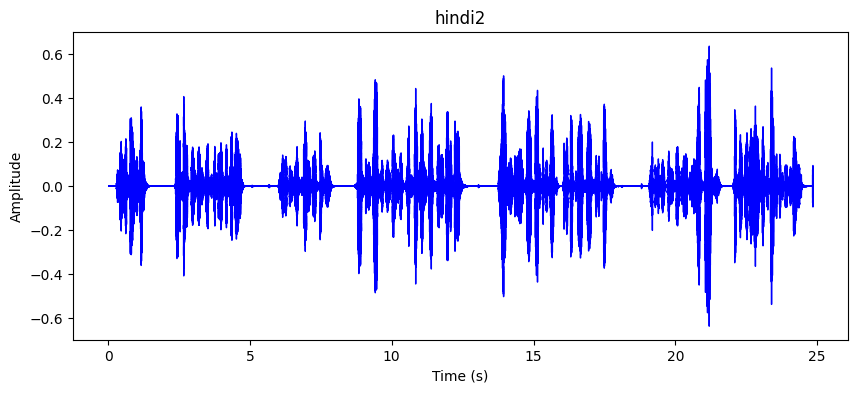

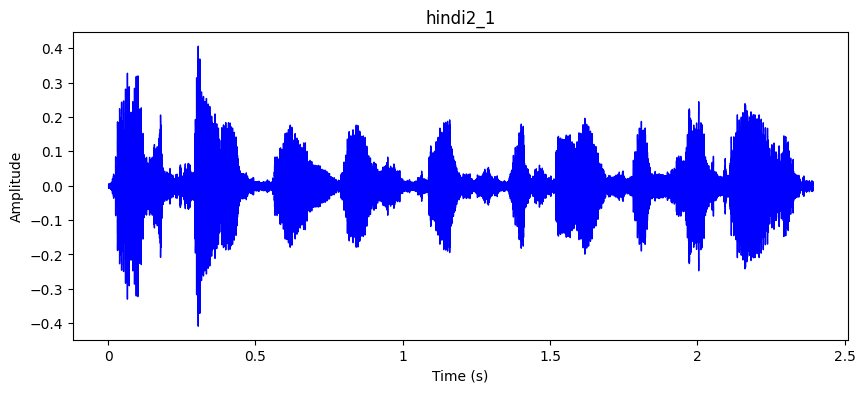

In [7]:
threshold_percentage = 0.05  # percentage of max energy
min_silence_duration = 1  # in seconds

audible_segments = split_audio_by_silence(
    audio2,
    sr,
    threshold_percentage=threshold_percentage,
    min_silence_duration=min_silence_duration,
)
segment=audible_segments[1]
plot_audio(audio2, sr, title="hindi2")
plot_audio(segment, sr, title="hindi2_1")

import soundfile as sf
sf.write("../data/processed/hindi2.mp3", segment, sr)

### convert audio to spectrogram

### extract features LPC, PLP and MFCC

## Train models